In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats

In [3]:
coffee_house_data = pd.read_excel("coffee-house-satisfactory-survey.xlsx")
coffee_house_data

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Coffee House?,6. How do you usually enjoy Coffee House?,7. How much time do you normally spend during your visit?,8. The nearest Coffee House's outlet to you is...?,9. Do you have Coffee House membership card?,...,"11. On average, how much would you spend at Coffee House per visit?","12. How would you rate the quality of Coffee House compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Coffee House?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Coffee House? (lighting, music, etc...)",16. You rate the WiFi quality at Coffee House as..,"17. How would you rate the service at Coffee House? (Promptness, friendliness, etc..)",18. How likely you will choose Coffee House for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Coffee House? Check all that apply.,20. Will you continue buying Coffee House?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2019/10/04 12:24:26 AM GMT+8,Male,40 and above,Self-employed,"RM25,000 - RM50,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,...,Around RM20 - RM40,3,3,5,3,2,4,4,Starbucks Website/Apps;Social Media,Yes
118,2019/10/04 9:30:09 AM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,...,More than RM40,5,5,5,5,5,5,5,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
119,2019/10/04 1:46:07 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,1km - 3km,No,...,Less than RM20,3,2,4,3,3,3,4,Social Media;Through friends and word of mouth...,No
120,2019/10/05 11:01:14 AM GMT+8,Female,From 20 to 29,Employed,"Less than RM25,000",Rarely,Take away,Below 30 minutes,within 1km,No,...,Less than RM20,4,4,4,4,4,4,4,Social Media;Through friends and word of mouth...,Yes


In [4]:
coffee_house_data.columns

Index(['Timestamp', '1. Your Gender', '2. Your Age',
       '3. Are you currently....?', '4. What is your annual income?',
       '5. How often do you visit Coffee House?',
       '6. How do you usually enjoy Coffee House?',
       '7. How much time do you normally  spend during your visit?',
       '8. The nearest Coffee House's outlet to you is...?',
       '9. Do you have Coffee House membership card?',
       '10. What do you most frequently purchase at Coffee House?',
       '11. On average, how much would you spend at Coffee House per visit?',
       '12. How would you rate the quality of Coffee House compared to other brands (Coffee Bean, Old Town White Coffee..) to be:',
       '13. How would you rate the price range at Coffee House?',
       '14. How important are sales and promotions in your purchase decision?',
       '15. How would you rate the ambiance at Coffee House? (lighting, music, etc...)',
       '16. You rate the WiFi quality at Coffee House as..',
       '17. How 

In [5]:
coffee_house_data.rename(columns = {'1. Your Gender': 'Gender', '2. Your Age':'Age',
       '3. Are you currently....?': 'Employment Status', '4. What is your annual income?':'Annual income',
       '5. How often do you visit Coffee House?': 'Frequency at CH',
       '6. How do you usually enjoy Coffee House?': 'Service mode at CH',
       '7. How much time do you normally  spend during your visit?': 'time spent at CH',
       '8. The nearest Coffee House\'s outlet to you is...?': 'proximity from CH' ,
       '9. Do you have Coffee House membership card?': 'Membership',
       '10. What do you most frequently purchase at Coffee House?':'frequent purchase',
       '11. On average, how much would you spend at Coffee House per visit?':'Money spent at CH',
       '12. How would you rate the quality of Coffee House compared to other brands (Coffee Bean, Old Town White Coffee..) to be:': 'Coffee rating',
       '13. How would you rate the price range at Coffee House?': 'Price range rating',
       '14. How important are sales and promotions in your purchase decision?':'Sale/promotion importancy',
       '15. How would you rate the ambiance at Coffee House? (lighting, music, etc...)':'Ambiance rating of CH',
       '16. You rate the WiFi quality at Coffee House as..':'Wifi rating',
       '17. How would you rate the service at Coffee House? (Promptness, friendliness, etc..)':'Service rating',
       '19. How do you come to hear of promotions at Coffee House? Check all that apply.':'Visibility',
       '20. Will you continue buying Coffee House?':'Retention'}, inplace = True)
coffee_house_data.head()


,Timestamp,Gender,Age,Employment Status,Annual income,Frequency at CH,Service mode at CH,time spent at CH,proximity from CH,Membership,...,Money spent at CH,Coffee rating,Price range rating,Sale/promotion importancy,Ambiance rating of CH,Wifi rating,Service rating,18. How likely you will choose Coffee House for doing business meetings or hangout with friends?,Visibility,Retention
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [6]:
coffee_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
 #   Column                                                                                            Non-Null Count  Dtype 
---  ------                                                                                            --------------  ----- 
 0   Timestamp                                                                                         122 non-null    object
 1   Gender                                                                                            122 non-null    object
 2   Age                                                                                               122 non-null    object
 3   Employment Status                                                                                 122 non-null    object
 4   Annual income                                                                                     122 non-null    object
 5   Frequenc

In [7]:
print(coffee_house_data.duplicated().sum())

0


In [8]:
coffee_house_data.isnull().sum()

Timestamp                                                                                           0
Gender                                                                                              0
Age                                                                                                 0
Employment Status                                                                                   0
Annual income                                                                                       0
Frequency at CH                                                                                     0
Service mode at CH                                                                                  1
time spent at CH                                                                                    0
proximity from CH                                                                                   0
Membership                                                                        

In [9]:
coffee_house_data = coffee_house_data.dropna()


In [10]:
coffee_house_data.isnull().sum()

Timestamp                                                                                           0
Gender                                                                                              0
Age                                                                                                 0
Employment Status                                                                                   0
Annual income                                                                                       0
Frequency at CH                                                                                     0
Service mode at CH                                                                                  0
time spent at CH                                                                                    0
proximity from CH                                                                                   0
Membership                                                                        

In [11]:
coffee_house_data.drop(labels=["Timestamp"], axis='columns')

,Gender,Age,Employment Status,Annual income,Frequency at CH,Service mode at CH,time spent at CH,proximity from CH,Membership,frequent purchase,Money spent at CH,Coffee rating,Price range rating,Sale/promotion importancy,Ambiance rating of CH,Wifi rating,Service rating,18. How likely you will choose Coffee House for doing business meetings or hangout with friends?,Visibility,Retention
0,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Cold drinks;Pastries,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Sandwiches,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Male,40 and above,Self-employed,"RM25,000 - RM50,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,Coffee,Around RM20 - RM40,3,3,5,3,2,4,4,Starbucks Website/Apps;Social Media,Yes
118,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,Coffee;Cold drinks;Juices;Pastries;Sandwiches,More than RM40,5,5,5,5,5,5,5,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
119,Male,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Cold drinks,Less than RM20,3,2,4,3,3,3,4,Social Media;Through friends and word of mouth...,No
120,Female,From 20 to 29,Employed,"Less than RM25,000",Rarely,Take away,Below 30 minutes,within 1km,No,Coffee,Less than RM20,4,4,4,4,4,4,4,Social Media;Through friends and word of mouth...,Yes


In [12]:
coffee_house_data.describe()

,Coffee rating,Price range rating,Sale/promotion importancy,Ambiance rating of CH,Wifi rating,Service rating,18. How likely you will choose Coffee House for doing business meetings or hangout with friends?
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,3.685950,2.909091,3.818182,3.760331,3.256198,3.752066,3.520661
std,0.913173,1.072381,1.064581,0.931171,0.962020,0.829468,1.033595
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


<Axes: xlabel='Employment Status', ylabel='count'>

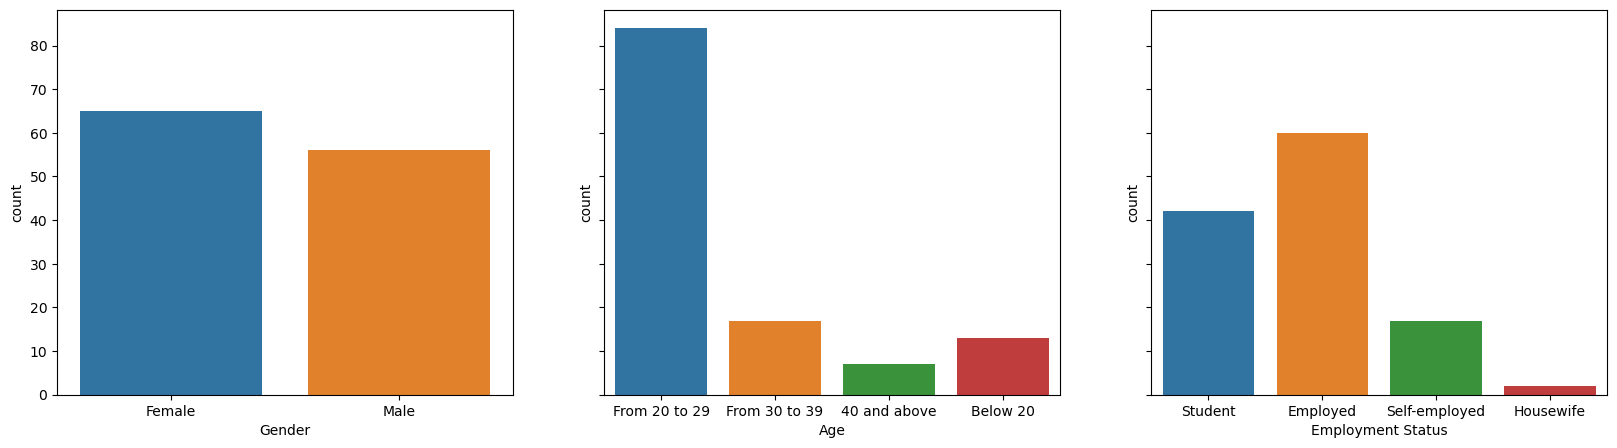

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
sns.countplot(ax=axes[0], x='Gender', data = coffee_house_data)
sns.countplot(ax=axes[1], x='Age', data = coffee_house_data)
sns.countplot(ax=axes[2], x='Employment Status', data = coffee_house_data)

<Axes: xlabel='Annual income', ylabel='count'>

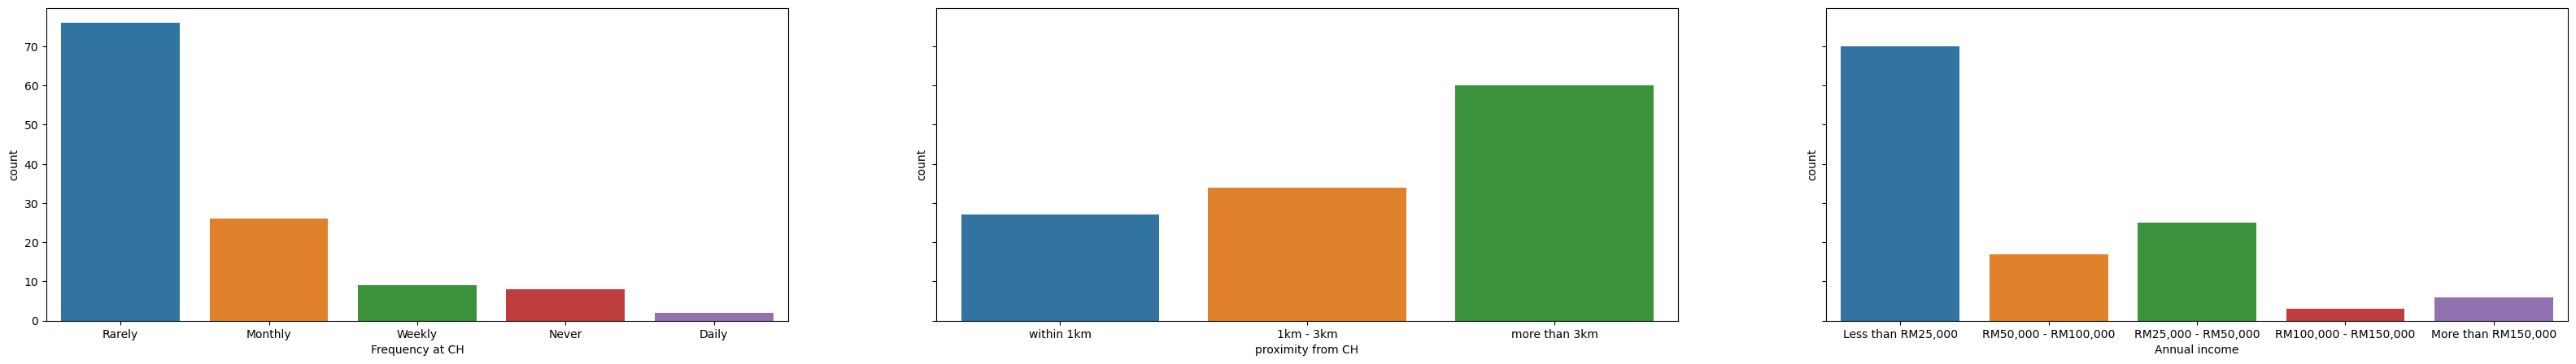

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(40, 5), sharey=True)
sns.countplot(ax=axes[0],x='Frequency at CH', data = coffee_house_data)
sns.countplot(ax=axes[1],x='proximity from CH', data = coffee_house_data)
sns.countplot(ax=axes[2],x='Annual income', data = coffee_house_data)

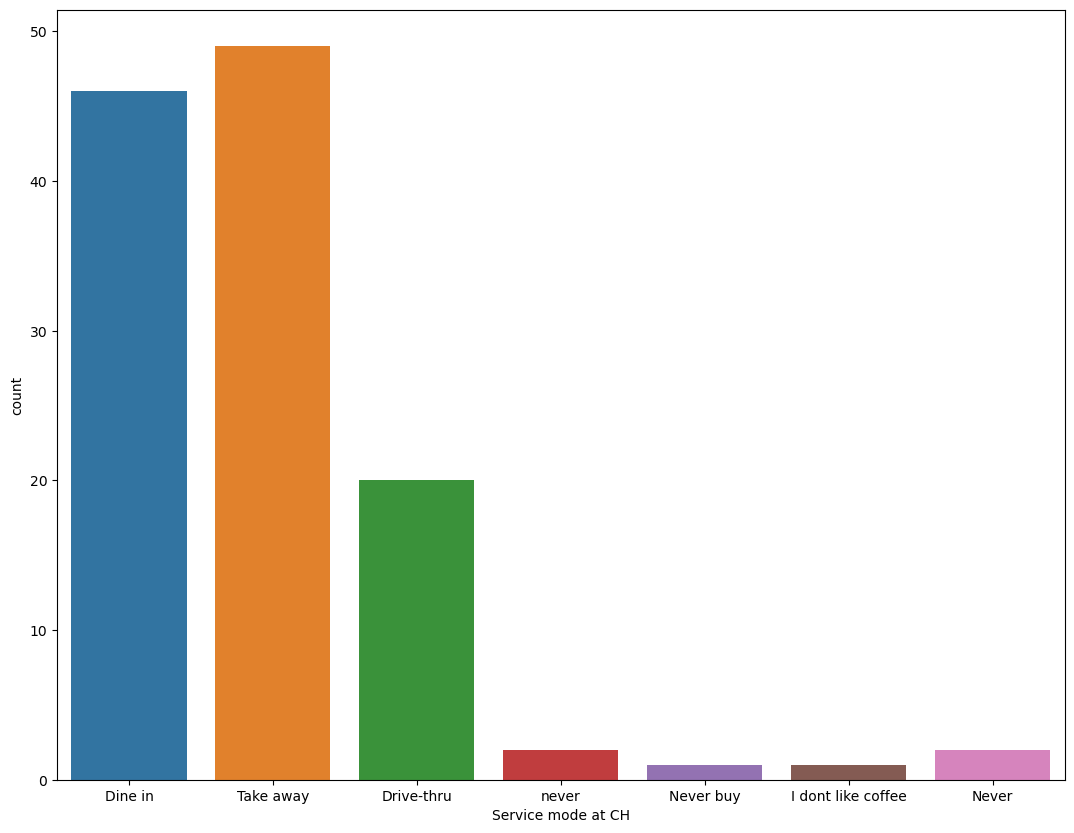

In [15]:
fig, ax = plt.subplots(figsize=(13, 10))
sns.countplot(x='Service mode at CH', data = coffee_house_data)
plt.show()

In [16]:
coffee_house_data['frequent purchase'].value_counts()

Coffee                                           65
Cold drinks                                      25
Coffee;Pastries                                   6
Coffee;Cold drinks                                6
Coffee;Sandwiches                                 3
Pastries                                          2
Cold drinks;Juices;Pastries                       2
Coffee;Pastries;Sandwiches                        1
Coffee;Juices;Pastries;Sandwiches                 1
Cold drinks;Pastries                              1
Coffee;Cold drinks;Pastries;Sandwiches            1
Never                                             1
Jaws chip                                         1
cake                                              1
Cold drinks;Pastries;Sandwiches                   1
Cold drinks;Never                                 1
never                                             1
Nothing                                           1
Coffee;Cold drinks;Juices;Pastries;Sandwiches     1
Name: freque

In [17]:
coffee_house_data['Coffee rating'].value_counts()

4    49
3    39
5    23
2     8
1     2
Name: Coffee rating, dtype: int64

<Axes: xlabel='Retention', ylabel='count'>

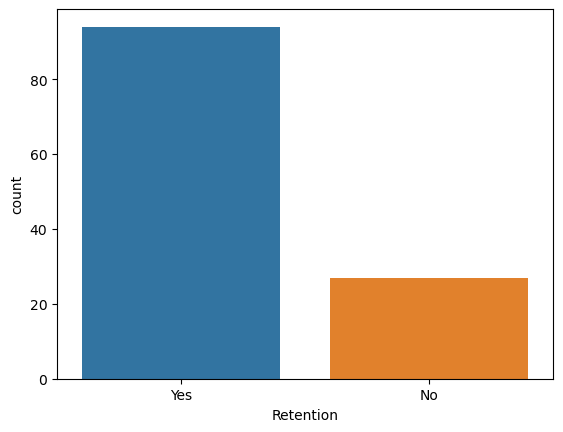

In [18]:
sns.countplot(x='Retention', data = coffee_house_data)

<Axes: xlabel='Gender', ylabel='Count'>

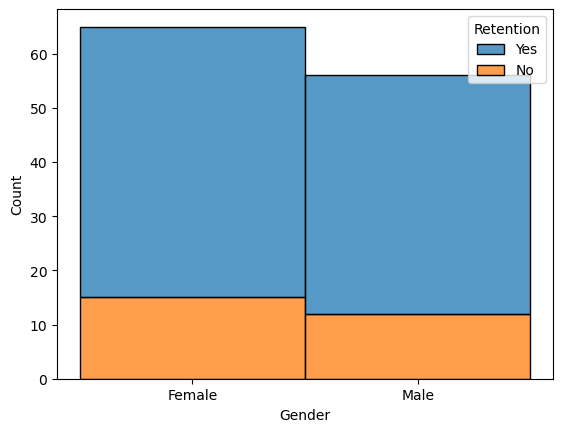

In [19]:

sns.histplot(data=coffee_house_data, x='Gender', hue='Retention', multiple='stack')

In [20]:
coffee_house_data['Price range rating'].value_counts()

3    48
2    27
4    24
1    13
5     9
Name: Price range rating, dtype: int64

In [21]:
coffee_house_data['Service rating'].value_counts()

4    51
3    42
5    23
2     4
1     1
Name: Service rating, dtype: int64

In [22]:
coffee_house_data['Wifi rating'].value_counts()

3    53
4    38
2    13
5    10
1     7
Name: Wifi rating, dtype: int64

In [23]:
coffee_house_data['Ambiance rating of CH'].value_counts()

4    52
3    34
5    26
2     6
1     3
Name: Ambiance rating of CH, dtype: int64

In [24]:
not_returning = coffee_house_data[coffee_house_data['Retention']== 'No']
not_returning

,Timestamp,Gender,Age,Employment Status,Annual income,Frequency at CH,Service mode at CH,time spent at CH,proximity from CH,Membership,...,Money spent at CH,Coffee rating,Price range rating,Sale/promotion importancy,Ambiance rating of CH,Wifi rating,Service rating,18. How likely you will choose Coffee House for doing business meetings or hangout with friends?,Visibility,Retention
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
11,2019/10/01 12:48:26 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,more than 3km,No,...,Less than RM20,3,2,4,4,3,4,4,Starbucks Website/Apps;Social Media;Through fr...,No
14,2019/10/01 12:53:16 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,within 1km,Yes,...,Less than RM20,5,2,5,5,5,5,2,Social Media;Through friends and word of mouth...,No
15,2019/10/01 12:57:31 PM GMT+8,Female,From 20 to 29,Employed,"Less than RM25,000",Rarely,Take away,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,1,5,4,3,4,4,Starbucks Website/Apps,No
20,2019/10/01 1:13:45 PM GMT+8,Male,From 30 to 39,Employed,"RM100,000 - RM150,000",Rarely,Take away,Below 30 minutes,within 1km,Yes,...,Around RM20 - RM40,2,2,5,3,3,4,3,Social Media;Emails,No
22,2019/10/01 1:21:50 PM GMT+8,Male,From 20 to 29,Employed,"RM25,000 - RM50,000",Rarely,Dine in,More than 3 hours,within 1km,No,...,Less than RM20,5,2,5,5,2,4,3,Through friends and word of mouth,No
26,2019/10/01 1:29:11 PM GMT+8,Male,From 30 to 39,Employed,"More than RM150,000",Rarely,Drive-thru,Below 30 minutes,1km - 3km,No,...,Less than RM20,4,2,4,4,4,4,2,Application offer,No
33,2019/10/01 1:45:43 PM GMT+8,Female,From 20 to 29,Employed,"RM25,000 - RM50,000",Rarely,Dine in,Between 30 minutes to 1 hour,1km - 3km,Yes,...,Less than RM20,3,2,3,3,3,4,3,Social Media,No
35,2019/10/01 1:51:56 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,4,2,4,4,3,4,1,Social Media,No
51,2019/10/01 3:16:32 PM GMT+8,Female,Below 20,Student,"Less than RM25,000",Rarely,Dine in,Below 30 minutes,more than 3km,No,...,Less than RM20,3,3,2,2,2,4,3,Social Media;Through friends and word of mouth,No


In [25]:
not_returning.describe()

,Coffee rating,Price range rating,Sale/promotion importancy,Ambiance rating of CH,Wifi rating,Service rating,18. How likely you will choose Coffee House for doing business meetings or hangout with friends?
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,3.037037,2.037037,3.666667,3.222222,2.962963,3.444444,2.814815
std,1.055443,0.807726,1.208941,1.086042,0.939782,0.847319,1.075498
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.500000,3.000000,3.000000,2.500000,3.000000,2.000000
50%,3.000000,2.000000,4.000000,3.000000,3.000000,4.000000,3.000000
75%,4.000000,2.500000,5.000000,4.000000,3.500000,4.000000,4.000000
max,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [26]:
returning = coffee_house_data[coffee_house_data['Retention']== 'Yes']
returning

,Timestamp,Gender,Age,Employment Status,Annual income,Frequency at CH,Service mode at CH,time spent at CH,proximity from CH,Membership,...,Money spent at CH,Coffee rating,Price range rating,Sale/promotion importancy,Ambiance rating of CH,Wifi rating,Service rating,18. How likely you will choose Coffee House for doing business meetings or hangout with friends?,Visibility,Retention
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes
5,2019/10/01 12:39:39 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,more than 3km,No,...,Less than RM20,4,3,5,5,4,5,4,Social Media,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2019/10/03 10:38:42 PM GMT+8,Male,Below 20,Student,"Less than RM25,000",Daily,Take away,Below 30 minutes,more than 3km,No,...,Around RM20 - RM40,5,5,5,5,5,5,5,Social Media;Through friends and word of mouth,Yes
116,2019/10/03 11:24:55 PM GMT+8,Male,From 30 to 39,Student,"Less than RM25,000",Monthly,Dine in,Between 1 hour to 2 hours,more than 3km,No,...,Less than RM20,4,4,5,4,2,3,4,Social Media,Yes
117,2019/10/04 12:24:26 AM GMT+8,Male,40 and above,Self-employed,"RM25,000 - RM50,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,...,Around RM20 - RM40,3,3,5,3,2,4,4,Starbucks Website/Apps;Social Media,Yes
118,2019/10/04 9:30:09 AM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,...,More than RM40,5,5,5,5,5,5,5,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes


In [27]:
returning.describe()


,Coffee rating,Price range rating,Sale/promotion importancy,Ambiance rating of CH,Wifi rating,Service rating,18. How likely you will choose Coffee House for doing business meetings or hangout with friends?
count,94.00000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,3.87234,3.159574,3.861702,3.914894,3.340426,3.840426,3.723404
std,0.77922,1.008599,1.022342,0.825137,0.956620,0.807268,0.932153
min,2.00000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
25%,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,4.00000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000
75%,4.00000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


<Axes: xlabel='Coffee rating', ylabel='Count'>

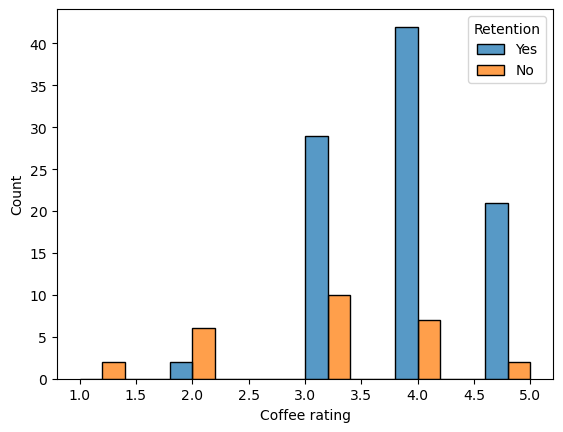

In [28]:
sns.histplot(data=coffee_house_data, x="Coffee rating", hue="Retention", multiple="dodge")

<Axes: xlabel='Sale/promotion importancy', ylabel='Count'>

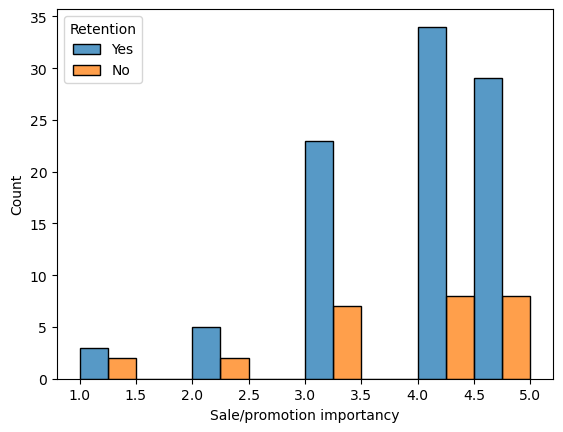

In [29]:
sns.histplot(data=coffee_house_data, x="Sale/promotion importancy", hue="Retention", multiple="dodge")


<Axes: xlabel='Price range rating', ylabel='Count'>

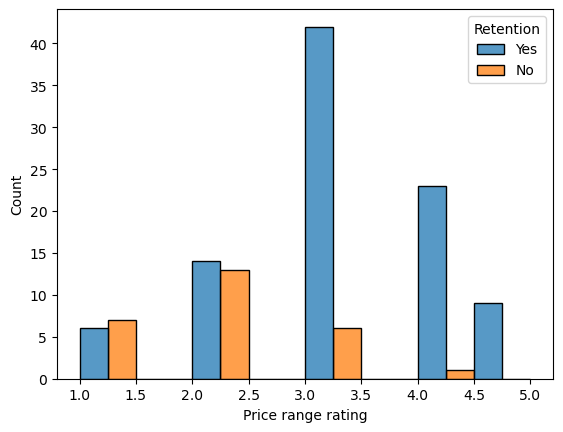

In [30]:
sns.histplot(data=coffee_house_data, x="Price range rating", hue="Retention", multiple="dodge")


<Axes: xlabel='Ambiance rating of CH', ylabel='Count'>

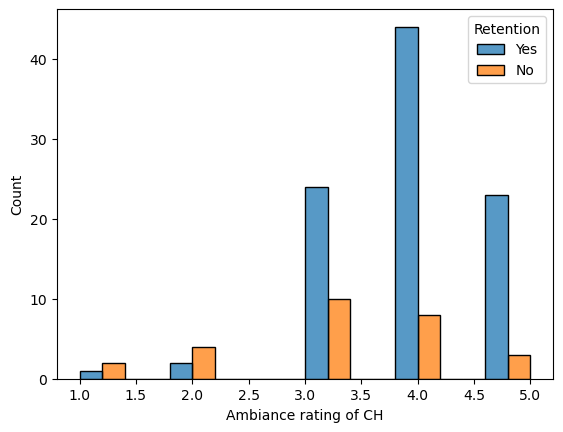

In [31]:
sns.histplot(data=coffee_house_data, x="Ambiance rating of CH", hue="Retention", multiple="dodge")


<Axes: xlabel='Wifi rating', ylabel='Count'>

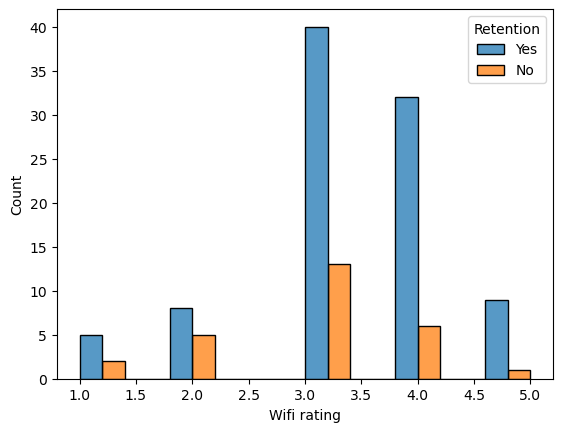

In [32]:
sns.histplot(data=coffee_house_data, x="Wifi rating", hue="Retention", multiple="dodge")

<Axes: xlabel='Service rating', ylabel='Count'>

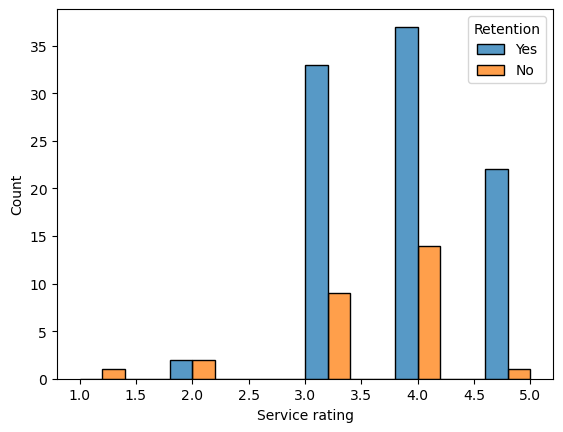

In [33]:
sns.histplot(data=coffee_house_data, x="Service rating", hue="Retention", multiple="dodge")

<Axes: xlabel='proximity from CH', ylabel='Count'>

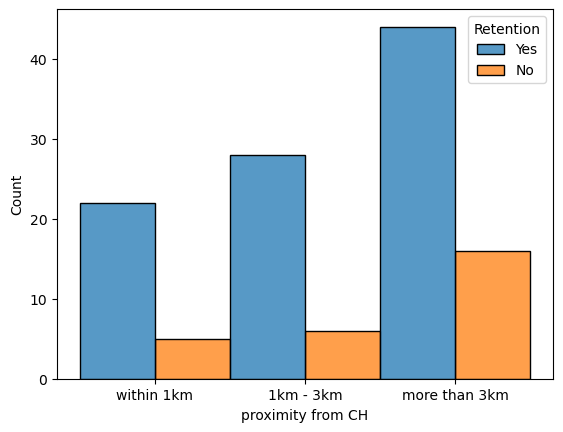

In [34]:
sns.histplot(data=coffee_house_data, x="proximity from CH", hue="Retention", multiple="dodge")

<Axes: xlabel='Employment Status', ylabel='Count'>

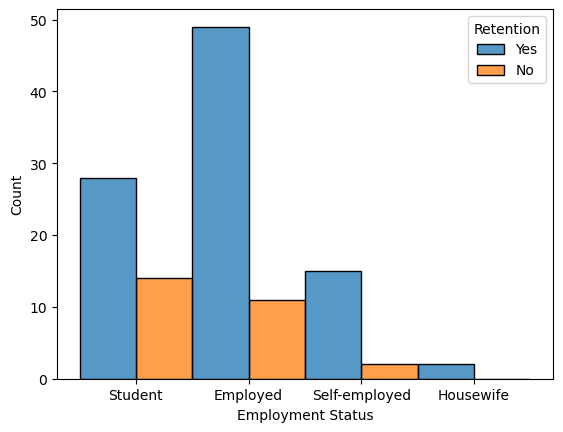

In [35]:
sns.histplot(data=coffee_house_data, x="Employment Status", hue="Retention", multiple="dodge")

In [36]:
coffee_house_data['Membership'].value_counts()

No     61
Yes    60
Name: Membership, dtype: int64

<Axes: xlabel='Membership', ylabel='Count'>

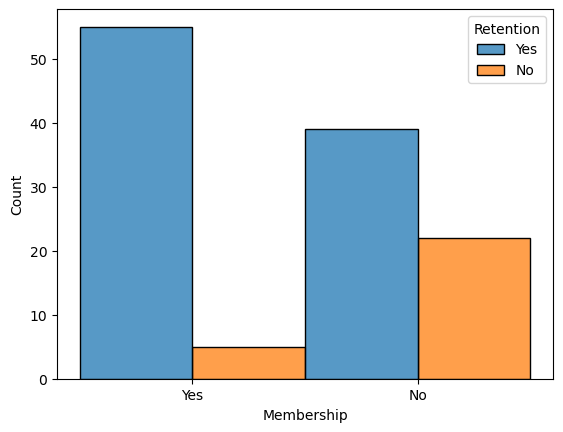

In [38]:
sns.histplot(data=coffee_house_data, x="Membership", hue="Retention", multiple="dodge")

In [39]:
coffee_house_data['Retention'].value_counts()

Yes    94
No     27
Name: Retention, dtype: int64

Most customer loved the cafe, amd will love to come back.

In [37]:
datatoexcel = pd.ExcelWriter('Coffee.xlsx')
coffee_house_data.to_excel(datatoexcel)
datatoexcel.save()
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


C:\Users\HP\AppData\Local\Temp\ipykernel_9320\3443986847.py:3: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  datatoexcel.save()
